# Project Overview

This project aims to analyze biodiversity data sourced from the National Parks Service, specifically focusing on various species observed in different national park locations.

The project encompasses scoping, analysis, data preparation, plotting, and an exploration of findings.

### Key Questions

To provide insights into the biodiversity data, the project seeks answers to the following questions:

1. **Distribution of Protected Status:**
    - What is the distribution of protected statuses across species categories?

2. **Observation Frequency:**
    - What is the frequency of observations for different protected species categories?

3. **Ratio of Protected Species per Park:**
    - What is the ratio of protected species per park?

4. **Correlation Analysis:**
    - Is there a correlation between invasive species, such as the wild hog, and critically endangered species, like the red wolf?

### Data Sources

The project utilizes data from two files:

- **Observations Data (`Observations.csv`):**
  - Provided by [Codecademy.com](https://www.codecademy.com).

- **Species Information Data (`Species_info.csv`):**
  - Also provided by [Codecademy.com](https://www.codecademy.com).

*Note:* The data for this project is inspired by real data but is mostly fictional.

### Tableau

You can find my Tableau Viz [here](https://public.tableau.com/app/profile/rachel.wagner/viz/ProtectedSpeciesAcrossFourNationalParks/Dashboard1).

#### Import Python Modules

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#### Import CSVs & View Data Headers

In [54]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [55]:
species_info = pd.read_csv('species_info.csv')
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### Examine Data

In [56]:
# which parks are included?
observations['park_name'].unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [57]:
# what are the categories?
species_info['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [58]:
# how many species?
species_info['scientific_name'].nunique()

5541

In [59]:
# what are the conservation statuses?
species_info['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

#### Clean and Merge Data

In [60]:
# merge dataframes
df = pd.merge(observations, species_info, how='inner', on='scientific_name')
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


In [61]:
# create protected status binary value
df['protected'] = df['conservation_status'].notnull()
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN,False


In [62]:
# change null values in conservation_status to 'Least Concern'
df['conservation_status'] = df['conservation_status'].fillna('Least Concern')
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Least Concern,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Least Concern,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Least Concern,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Least Concern,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Least Concern,False


In [63]:
# convert conservation status to category with ordered values
df['conservation_status'] = pd.Categorical(df['conservation_status'], categories=['Endangered', 'Threatened', 'Species of Concern', 'In Recovery', 'Least Concern'], ordered=True)

In [64]:
# create a filtered dataframe for future reference of only protected species
filtered_df = df[df['conservation_status'] != 'Least Concern']

### Question 1:
#### What is the distribution of protected statuses across species categories?

'Species of Concern' is the largest category of protected statuses with most of the species belonging to Birds, Mammals, and Vascular Plants. Mammals have the largest number of Endangered species, and Birds have the second most number of Endangered species. Birds have the most total species under protected statuses.

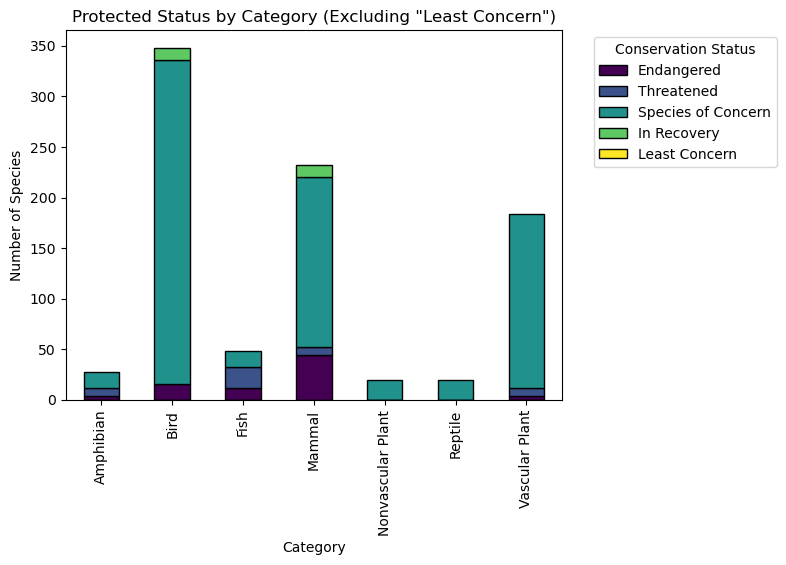

In [65]:
# plot stacked bar chart with category and conservation status, minus 'Least Concern'
pivot_df = filtered_df.pivot_table(index='category', columns='conservation_status', aggfunc='size', fill_value=0)

pivot_df.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')

plt.title('Protected Status by Category (Excluding "Least Concern")')
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Question 2:
#### What is the frequency of observations for different protected species categories?

The frequency of observations appears to mimic the ratio of protected statuses closely, with the exception of Endangered species.

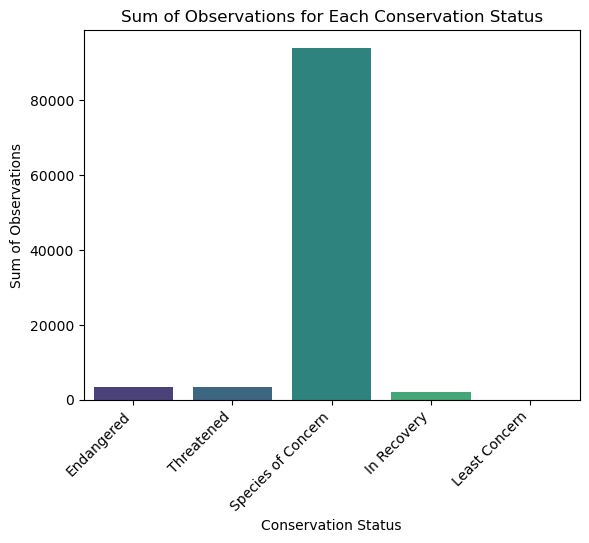

In [66]:
# plot sum of observations per conservation status
sum_observation_by_status = filtered_df.groupby('conservation_status')['observations'].sum().reset_index()

# Create a bar chart using seaborn
ax = sns.barplot(x='conservation_status', y='observations', data=sum_observation_by_status, palette='viridis')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding labels and title
plt.title('Sum of Observations for Each Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Sum of Observations')
plt.show()

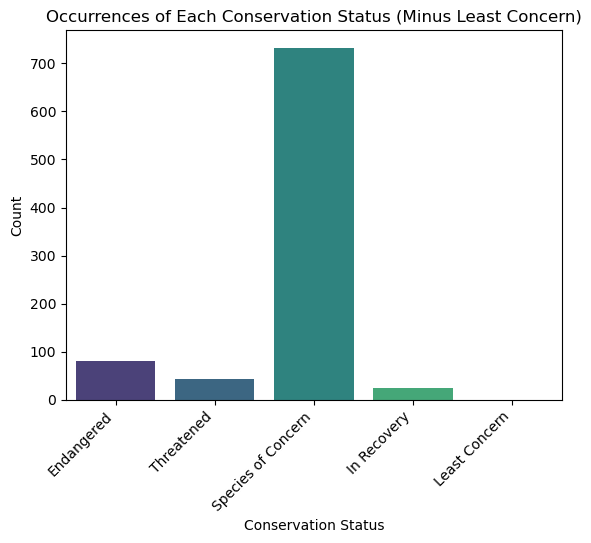

In [67]:
# plot totals of each conservation status, minus 'least concern', for comparison
ax = sns.countplot(x='conservation_status', data=filtered_df, palette='viridis')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adding labels and title
plt.title('Occurrences of Each Conservation Status (Minus Least Concern)')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()

### Question 3
#### What is the ratio of protected species per park?

Yellowstone National Park has the most observations of protected species of the four parks. Yosemite is second, Bryce National Park is third, and Great Smoky Mountains National Park is fourth. Each park has roughly the same ratios of protected status observations.

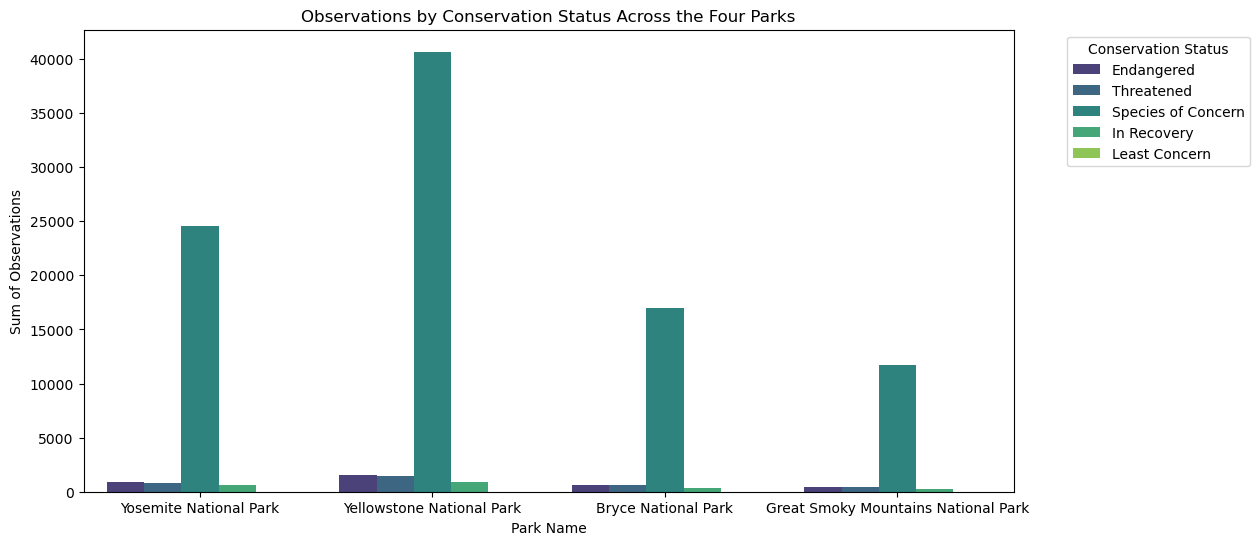

In [69]:
# plot 
plt.figure(figsize=(12, 6))
sns.barplot(x='park_name', y='observations', hue='conservation_status', data=filtered_df, palette='viridis', errorbar=None, estimator=sum)

plt.title('Observations by Conservation Status Across the Four Parks')
plt.xlabel('Park Name')
plt.ylabel('Sum of Observations')
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Question 4:
#### Is there a correlation between invasive species, such as the wild hog, and critically endangered species, like the red wolf?

Given the data, it is unclear whether or not there is a correlation between the wild hog (Sus scrofa) and the red wolf (Canis rufus).

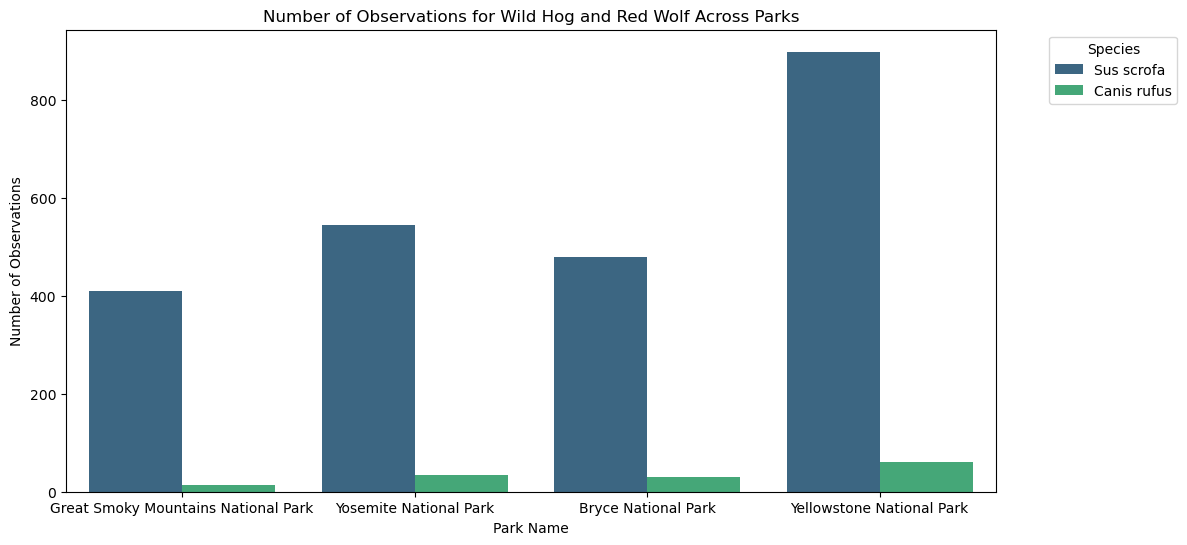

In [79]:
#filter dataframe down to Sus scrofa (wild hog) and Canis rufus (red wolf)
species_df = df[df['scientific_name'].isin(['Sus scrofa', 'Canis rufus'])]

#plot number of observations of each species across each park
plt.figure(figsize=(12, 6))
sns.barplot(x='park_name', y='observations', hue='scientific_name', data=species_df, palette='viridis', errorbar=None, estimator=sum)

plt.title('Number of Observations for Wild Hog and Red Wolf Across Parks')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

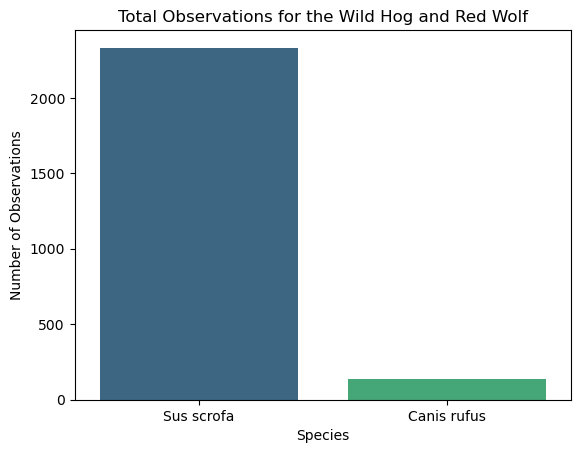

In [80]:
#plot total observations of each species
sns.barplot(x='scientific_name', y='observations', data=species_df, palette='viridis', errorbar=None, estimator=sum)

plt.title('Total Observations for the Wild Hog and Red Wolf')
plt.xlabel('Species')
plt.ylabel("Number of Observations")
plt.show()

# Conclusion
### Distribution of Protected Status:
The examination of the distribution of protected statuses across species categories reveals insightful patterns. The category 'Species of Concern' emerges as the largest, encompassing a majority of species within Birds, Mammals, and Vascular Plants. Among these, Mammals exhibit the highest count of Endangered species, while Birds rank second in the number of Endangered species. Notably, Birds house the largest overall number of species under protected statuses.

### Observation Frequency:
Analyzing the frequency of observations across different protected species categories reveals a pattern closely mirroring the distribution of protected statuses, with one exception. While the frequency aligns well with the protected status ratio, Endangered species present a deviation.

### Ratio of Protected Species per Park:
The assessment of the ratio of protected species per park points to Yellowstone National Park as the leader in observations of protected species among the four parks. Yosemite National Park secures the second position, followed by Bryce National Park and Great Smoky Mountains National Park. Interestingly, each park maintains a comparable ratio of observations for protected statuses.

### Correlation Analysis:
Exploring the potential correlation between invasive species, such as the wild hog (Sus scrofa), and critically endangered species, like the red wolf (Canis rufus), remains inconclusive based on the available data. Further investigation and data collection may be necessary to draw more definitive conclusions in this regard.